# Imports

In [46]:
#imports here
from time import sleep
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support.ui import WebDriverWait
import requests 
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import scipy as sc
import numpy as np
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Crawling

In [8]:
# Creata an empty data frame
materialOfBag = None
colorOfBag = None
priceOfBag = None
typeOfBag = None
brandOfBag = None
countryOfBag = None
descriptionOfBag = None
newSeason = None
values = [[brandOfBag, typeOfBag,materialOfBag,colorOfBag,newSeason,countryOfBag,descriptionOfBag,priceOfBag]]

# Create a list of column names

columns = ['Brand','Type','Material','color','From New Season','Manufacturing country','Description','Price']

# Create a dictionary with the column names and values

data = {columns[0]: [row[0] for row in values],
        columns[1]: [row[1] for row in values],
        columns[2]: [row[2] for row in values],
        columns[3]: [row[3] for row in values],
        columns[4]: [row[4] for row in values],
        columns[5]: [row[5] for row in values],
        columns[6]: [row[6] for row in values],
       columns[7]: [row[7] for row in values],
       }
df = pd.DataFrame(data)
df.to_csv("DATA.csv")


In [9]:
#load dataframe

# specify the file path
file_path = 'C:/Users/yulia/data science COURSE/FinalVersion/DATA.csv'

# load the file as a DataFrame
df = pd.read_csv(file_path)
df

,Unnamed: 0,Brand,Type,Material,color,From New Season,Manufacturing country,Description,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# delete unnessesery column
del df["Unnamed: 0"]
df

,Brand,Type,Material,color,From New Season,Manufacturing country,Description,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#open FARFETCH webpage
driver = webdriver.Chrome('C:/HIT/Yeat 3/Data science/Chrome driver/chromedriver.exe')
driver.maximize_window()
url = "https://www.farfetch.com/il/shopping/women/bags-purses-1/items.aspx"
driver.get(url)

C:\Users\yulia\AppData\Local\Temp/ipykernel_21332/1864126509.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/HIT/Yeat 3/Data science/Chrome driver/chromedriver.exe')


In [17]:
pageNumber = '1'
pageUrl = 'https://www.farfetch.com/il/shopping/women/bags-purses-1/items.aspx?page='+ pageNumber +'&view=90&sort=3' 
driver.get(pageUrl)

In [19]:
try:
        closeButton = driver.find_element(By.XPATH,"//button[@data-component='ModalCloseButton']").click();
except:
    #if there in no popping window
        pass

In [22]:
# Gettint the data ONLY A DEMOSTRATION BECAUSE I HAVE ALREADY DONE THAT IN ANOTHER NOTEBOOK
for j in range(0,85):
    
    pageNumber = str(j)
    pageUrl = 'https://www.farfetch.com/il/shopping/women/bags-purses-1/items.aspx?page='+ pageNumber +'&view=90&sort=3' 
    driver.get(pageUrl)
    driver.implicitly_wait(5)
    
    for i in range(1,91):
        while True:
                pathToBagNumberInPage = '//ul[@data-testid="product-card-list"]/li['+ str(i) +']'
                getToProductPage = driver.find_element(By.XPATH,pathToBagNumberInPage).click();
                driver.implicitly_wait(5)
                header = driver.find_element_by_tag_name("h1").text
                if header == "429 Too Many Requests":
                    print("Too many requests, waiting for 30 minutes")
                    time.sleep(300) # wait for 5 minutes
                    driver.back()
                else:
                    break   

        time.sleep(7)
        materialOfBag = None
        colorOfBag = None
        priceOfBag = None
        typeOfBag = None
        brandOfBag = None
        countryOfBag = None
        descriptionOfBag = None
        newSeason = None
    
        #Get brand
        try:
            brandOfBag = driver.find_element(by=By.XPATH,value='//a[@data-type="brand"]').text
        except:
            pass
    
        try:        
            typeOfBag = driver.find_element(by=By.XPATH,value='//a[@data-type="subcategory"]').text
        except:
            pass
    
        #Get color
        try:
            colorOfBag = driver.find_element(by=By.XPATH,value='//ul[@class="_fdc1e5"]/li[1]').text
        except:
            pass
        
        #Get material 
        try:
            materialOfBag = driver.find_element(by=By.XPATH,value='//ul[@class="_fdc1e5"]/li[2]').text
        except:
            pass
    
        #Get country
        try:
            countryOfBag = driver.find_element(by=By.XPATH,value='//div[@class = "ltr-jeopbd"]/p[1]').text
        except:
            pass
    
        #Get description
        try:
            descriptionOfBag = driver.find_element(by=By.XPATH,value='//div[@class = "ltr-4y8w0i-Body e1s5vycj0"]/p[1]').text
        except:
            pass
    
        #Get season
        try:
            newSeason = driver.find_element(by=By.XPATH,value='//div[@class = "ltr-9fv542"]/p[1]').text
        except:
            pass
    
        #Get Price
        try:
            priceOfBag = driver.find_element(by=By.XPATH,value='//p[@data-component="PriceLarge"]').text
        except:
            pass
    
    #Get Price if bag is on sale
    
        if priceOfBag == None:     
            try:
                priceOfBag = driver.find_element(by=By.XPATH,value='//p[@data-component="PriceFinalLarge"]').text
            except:
                pass
    
    # Add new row with the new data in the data frame
        new_row = pd.Series([brandOfBag, typeOfBag,materialOfBag,colorOfBag,newSeason,countryOfBag,descriptionOfBag,priceOfBag], index=df.columns)

    # Use the .append() method to add the new row to the DataFrame
        df = df.append(new_row, ignore_index=True)
        
        if i % 5 == 0:
            df.to_csv("DATA.csv")
            time.sleep(180)
       
        while True:
                driver.back()
                driver.implicitly_wait(10)
                header = driver.find_element_by_tag_name("h1").text  
                if header == "429 Too Many Requests":
                    print("Too many requests, waiting for 30 minutes")
                    time.sleep(300) # wait for 5 minutes
                    driver.refresh()
                else:
                    break
    
    time.sleep(20)

C:\Users\yulia\AppData\Local\Temp/ipykernel_21332/2338359729.py:14: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  header = driver.find_element_by_tag_name("h1").text
C:\Users\yulia\AppData\Local\Temp/ipykernel_21332/2338359729.py:100: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  header = driver.find_element_by_tag_name("h1").text


KeyboardInterrupt: 

In [21]:
df.to_csv("DATA.csv")

In [23]:
df = pd.read_csv(file_path)

In [28]:
df

,Brand,Type,Material,color,FromNewSeason,ManufacturingCountry,Description,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JW Anderson,Tote Bags,canvas,lilac,New Season,Made in Italy,JW Anderson elevates a simple tote silhouette ...,$662
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JW Anderson,Tote Bags,canvas,lilac,New Season,Made in Italy,JW Anderson elevates a simple tote silhouette ...,$662
...,...,...,...,...,...,...,...,...
7507,Love Moschino,Shoulder Bags,gold-tone logo plaque,white,New Season,NaN,NaN,$222
7508,Themoirè,Clutch Bags,pleat detailing,brown,Conscious,Made in Italy,NaN,$342
7509,Love Moschino,Backpacks,faux leather,black,New Season,NaN,NaN,$246
7510,Moschino,Messenger & Crossbody Bags,NaN,NaN,NaN,Made in Italy,NaN,$477


#  Cleanning the data
###   Dealing with:
### - Duplicates
### - False Data
### - Empty values

In [29]:
# deleting all duplicated data and saving it to a new datafile
df.drop_duplicates(inplace=True)
df.to_csv('clean_data.csv', index=False)

In [30]:
clean_file_path = 'C:/Users/yulia/data science COURSE/FinalVersion/clean_data.csv'
df_c= pd.read_csv(clean_file_path)
df_c

,Brand,Type,Material,color,FromNewSeason,ManufacturingCountry,Description,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JW Anderson,Tote Bags,canvas,lilac,New Season,Made in Italy,JW Anderson elevates a simple tote silhouette ...,$662
2,Balenciaga,Messenger & Crossbody Bags,calf leather,silver-tone,Conscious,Made in Italy,Balenciaga's Gossip wallet-on-chain is crafted...,$840
3,Acne Studios,Tote Bags,denim,light blue,New Season,Made in Italy,NaN,"$1,229"
4,Vivienne Westwood,Messenger & Crossbody Bags,faux leather,blue/multicolour,New Season,NaN,NaN,$492
...,...,...,...,...,...,...,...,...
6429,Polo Ralph Lauren,Shoulder Bags,calf leather,bright orchid pink,NaN,NaN,NaN,$419
6430,Love Moschino,Shoulder Bags,gold-tone logo plaque,white,New Season,NaN,NaN,$222
6431,Themoirè,Clutch Bags,pleat detailing,brown,Conscious,Made in Italy,NaN,$342
6432,Love Moschino,Backpacks,faux leather,black,New Season,NaN,NaN,$246


In [31]:
# lets see how many null values we have to know how trusted is our data
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6434 entries, 0 to 6433
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 6428 non-null   object
 1   Type                  6428 non-null   object
 2   Material              5763 non-null   object
 3   color                 5763 non-null   object
 4   FromNewSeason         1962 non-null   object
 5   ManufacturingCountry  2615 non-null   object
 6   Description           2432 non-null   object
 7   Price                 6424 non-null   object
dtypes: object(8)
memory usage: 402.2+ KB


In [32]:
# we have only a few rows with a null value in the price amd brand columns so lts delte them
df_c.dropna(subset=['Price'], inplace=True)
df_c.dropna(subset=['Brand'], inplace=True)
df_c.to_csv('clean_data.csv', index=False)
df_c= pd.read_csv(clean_file_path)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6422 entries, 0 to 6421
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 6422 non-null   object
 1   Type                  6422 non-null   object
 2   Material              5756 non-null   object
 3   color                 5756 non-null   object
 4   FromNewSeason         1961 non-null   object
 5   ManufacturingCountry  2609 non-null   object
 6   Description           2430 non-null   object
 7   Price                 6422 non-null   object
dtypes: object(8)
memory usage: 401.5+ KB


In [33]:
df_c.dtypes

Brand                   object
Type                    object
Material                object
color                   object
FromNewSeason           object
ManufacturingCountry    object
Description             object
Price                   object
dtype: object

In [34]:
# lets see the unique values of each column and chek if there are null values that are left in the brand ro price columns
for col in df_c.columns:
    print(col, len (df_c[col].unique()), df_c[col].unique())

Brand 262 ['JW Anderson' 'Balenciaga' 'Acne Studios' 'Vivienne Westwood'
 'Stella McCartney' 'Off-White' 'Jacquemus' 'Versace' 'Jimmy Choo'
 'Amina Muaddi' 'Valentino Garavani' 'Jil Sander' 'Marni' 'Balmain'
 'Alexander McQueen' 'The Attico' 'Gucci' 'Diesel' 'Patou'
 'Dolce & Gabbana' 'Goldbergh' 'Alexander Wang' 'Marc Jacobs' 'Vanina'
 'KHAITE' 'FPM Milano' 'See by Chloé' 'Tory Burch' 'Wandler' 'STAUD'
 'Rains' 'Ferragamo' 'Comme Des Garçons Wallet' 'MM6 Maison Margiela'
 'Perfect Moment' 'DeMellier' 'Isabel Marant' 'Benedetta Bruzziches'
 'Floyd' 'PUBLISHED BY' 'BY FAR' 'GANNI' 'ETRO' 'TOM FORD' 'Moschino'
 'Chloé' 'Kvadrat' 'Bao Bao Issey Miyake' 'Rosantica' "Tod's"
 'STAND STUDIO' 'Lemaire' 'STATE OF ESCAPE' 'lululemon' 'Vilebrequin'
 'Rapha' 'Sophie Bille Brahe' 'Paco Rabanne' 'Maison Margiela' 'LASTFRAME'
 'MACH & MACH' 'Courrèges' 'Rodo' 'Reco' 'Pleats Please Issey Miyake'
 'Brunello Cucinelli' 'Blumarine' 'Moncler' 'Savette' 'Mehry Mu'
 'Simone Rocha' 'Saint Laurent' 'Karl Lage

In [35]:
df_c['ManufacturingCountry'] = df_c['ManufacturingCountry'].str.replace('Made In Italy', 'Made in Italy')
df_c.to_csv('clean_data.csv', index=False)
col = 'ManufacturingCountry'
print(col, len(df_c[col].unique()), df_c[col].unique())

ManufacturingCountry 5 ['Made in Italy' nan 'Made in United States' 'Made in United Kingdom'
 'Made in France']


In [37]:
# the price column should be nomeric so next we wiil remove the $ from all the prices

df_c['Price'] = df_c['Price'].str.replace('$', '')
df_c['Price'] = df_c['Price'].str.replace(',', '')
df_c['Price'] = pd.to_numeric(df_c['Price'])
df_c.to_csv('clean_data.csv', index=False)
df_c

C:\Users\yulia\AppData\Local\Temp/ipykernel_21332/3131779187.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_c['Price'] = df_c['Price'].str.replace('$', '')


,Brand,Type,Material,color,FromNewSeason,ManufacturingCountry,Description,Price
0,JW Anderson,Tote Bags,canvas,lilac,New Season,Made in Italy,JW Anderson elevates a simple tote silhouette ...,662
1,Balenciaga,Messenger & Crossbody Bags,calf leather,silver-tone,Conscious,Made in Italy,Balenciaga's Gossip wallet-on-chain is crafted...,840
2,Acne Studios,Tote Bags,denim,light blue,New Season,Made in Italy,NaN,1229
3,Vivienne Westwood,Messenger & Crossbody Bags,faux leather,blue/multicolour,New Season,NaN,NaN,492
4,Stella McCartney,Shoulder Bags,chain-link trim,grape purple,Conscious,Made in Italy,NaN,854
...,...,...,...,...,...,...,...,...
6417,Polo Ralph Lauren,Shoulder Bags,calf leather,bright orchid pink,NaN,NaN,NaN,419
6418,Love Moschino,Shoulder Bags,gold-tone logo plaque,white,New Season,NaN,NaN,222
6419,Themoirè,Clutch Bags,pleat detailing,brown,Conscious,Made in Italy,NaN,342
6420,Love Moschino,Backpacks,faux leather,black,New Season,NaN,NaN,246


In [38]:
# converting the description values to 1 if have a value and 0 if the column value is null
df_c['Description'] = df_c['Description'].fillna(0).astype(bool).astype(int)
df_c.to_csv('clean_data.csv', index=False)
# print the modified dataframe
df_c

,Brand,Type,Material,color,FromNewSeason,ManufacturingCountry,Description,Price
0,JW Anderson,Tote Bags,canvas,lilac,New Season,Made in Italy,1,662
1,Balenciaga,Messenger & Crossbody Bags,calf leather,silver-tone,Conscious,Made in Italy,1,840
2,Acne Studios,Tote Bags,denim,light blue,New Season,Made in Italy,0,1229
3,Vivienne Westwood,Messenger & Crossbody Bags,faux leather,blue/multicolour,New Season,NaN,0,492
4,Stella McCartney,Shoulder Bags,chain-link trim,grape purple,Conscious,Made in Italy,0,854
...,...,...,...,...,...,...,...,...
6417,Polo Ralph Lauren,Shoulder Bags,calf leather,bright orchid pink,NaN,NaN,0,419
6418,Love Moschino,Shoulder Bags,gold-tone logo plaque,white,New Season,NaN,0,222
6419,Themoirè,Clutch Bags,pleat detailing,brown,Conscious,Made in Italy,0,342
6420,Love Moschino,Backpacks,faux leather,black,New Season,NaN,0,246


In [39]:
df_c.dtypes

Brand                   object
Type                    object
Material                object
color                   object
FromNewSeason           object
ManufacturingCountry    object
Description              int32
Price                    int64
dtype: object

In [40]:
df_c.describe()

,Description,Price
count,6422.000000,6422.000000
mean,0.378387,771.725319
std,0.485023,795.438776
min,0.000000,35.000000
25%,0.000000,253.000000
50%,0.000000,462.500000
75%,1.000000,980.000000
max,1.000000,13696.000000


# Visualize Data

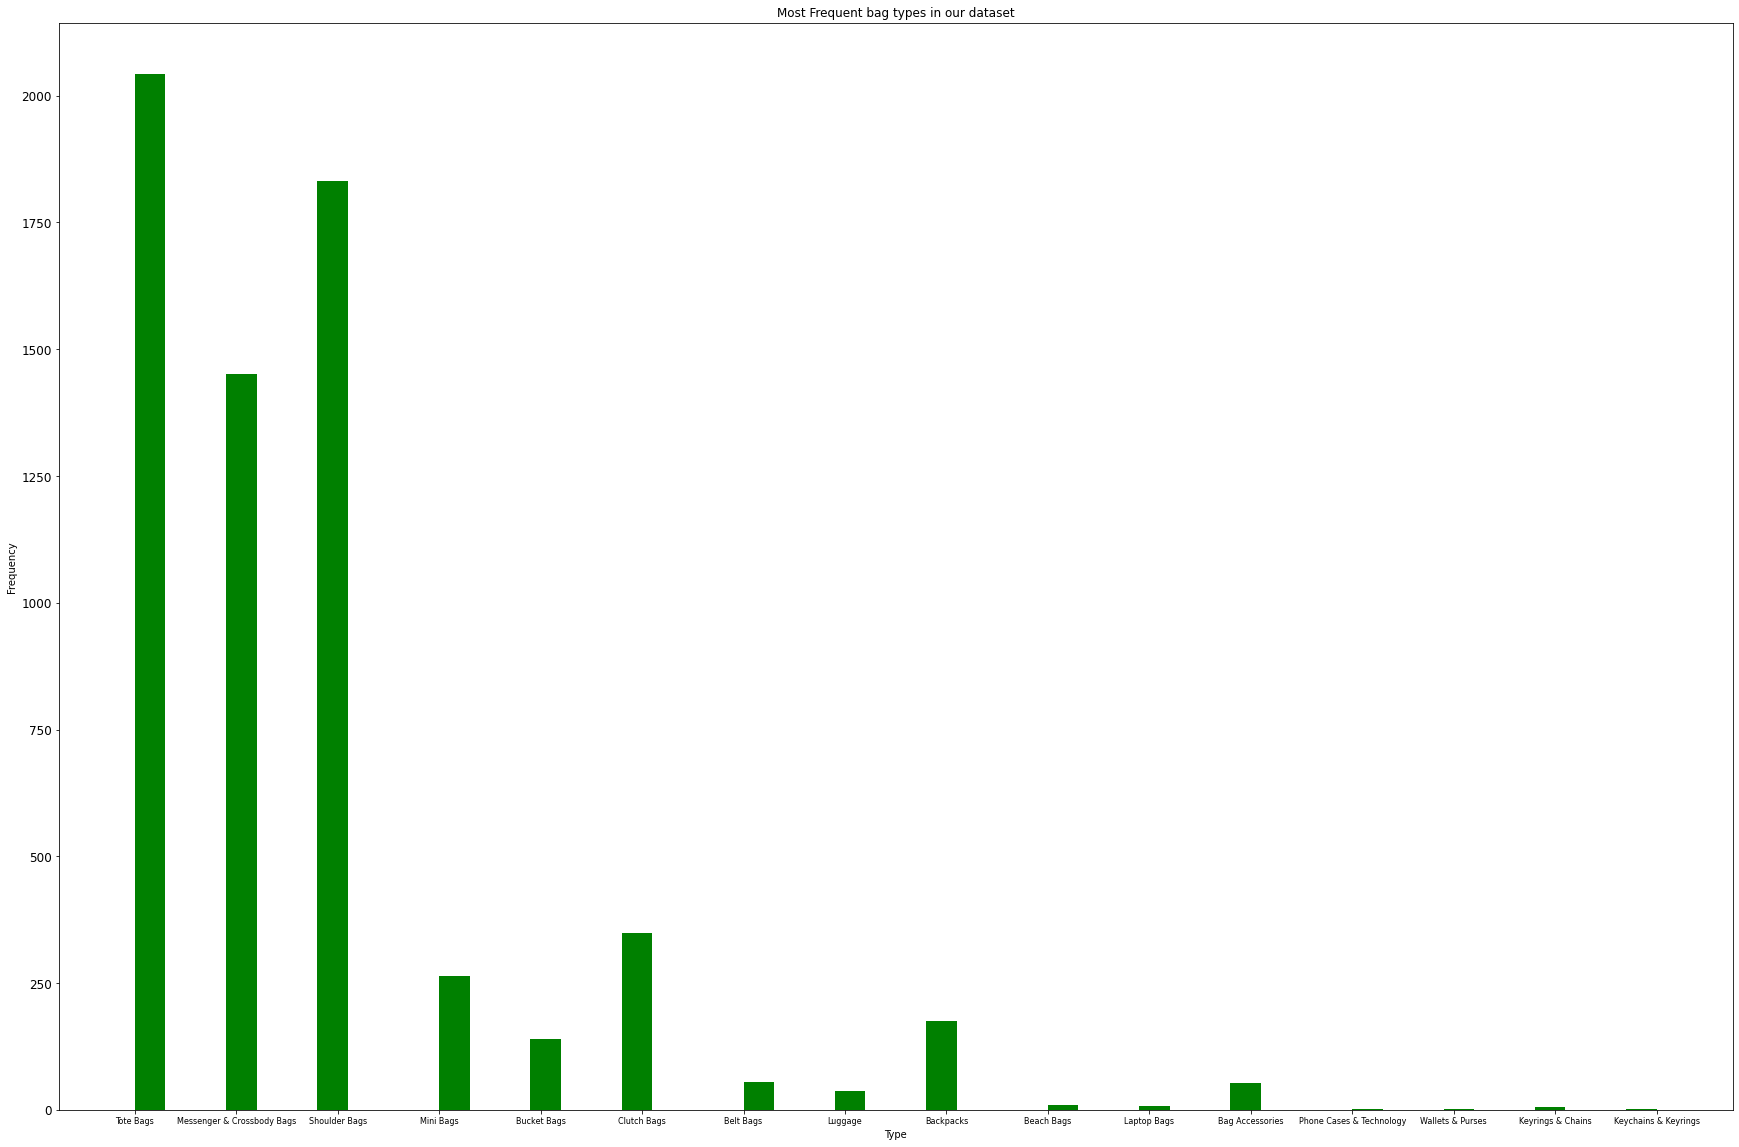

In [41]:
# histogram of the Type of bags Frequency in our dataset
plt.figure(figsize=(30,20))
plt.hist(df_c['Type'], bins=50, color='green')


# add labels and title
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title('Most Frequent bag types in our dataset')

plt.xticks(fontsize=8)
plt.yticks(fontsize=12)

# display the plot
plt.show()

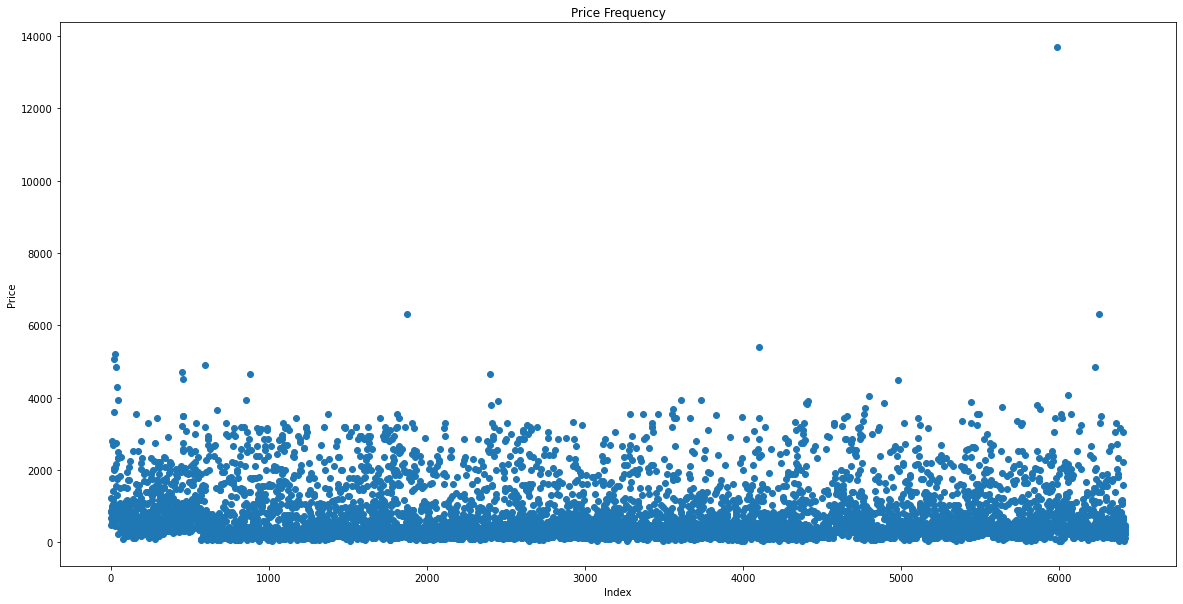

In [42]:
# Scatter plot of prices frequency
plt.subplots(figsize=(20, 10))
plt.scatter(df_c.index, df_c['Price'])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Frequency')

plt.show()

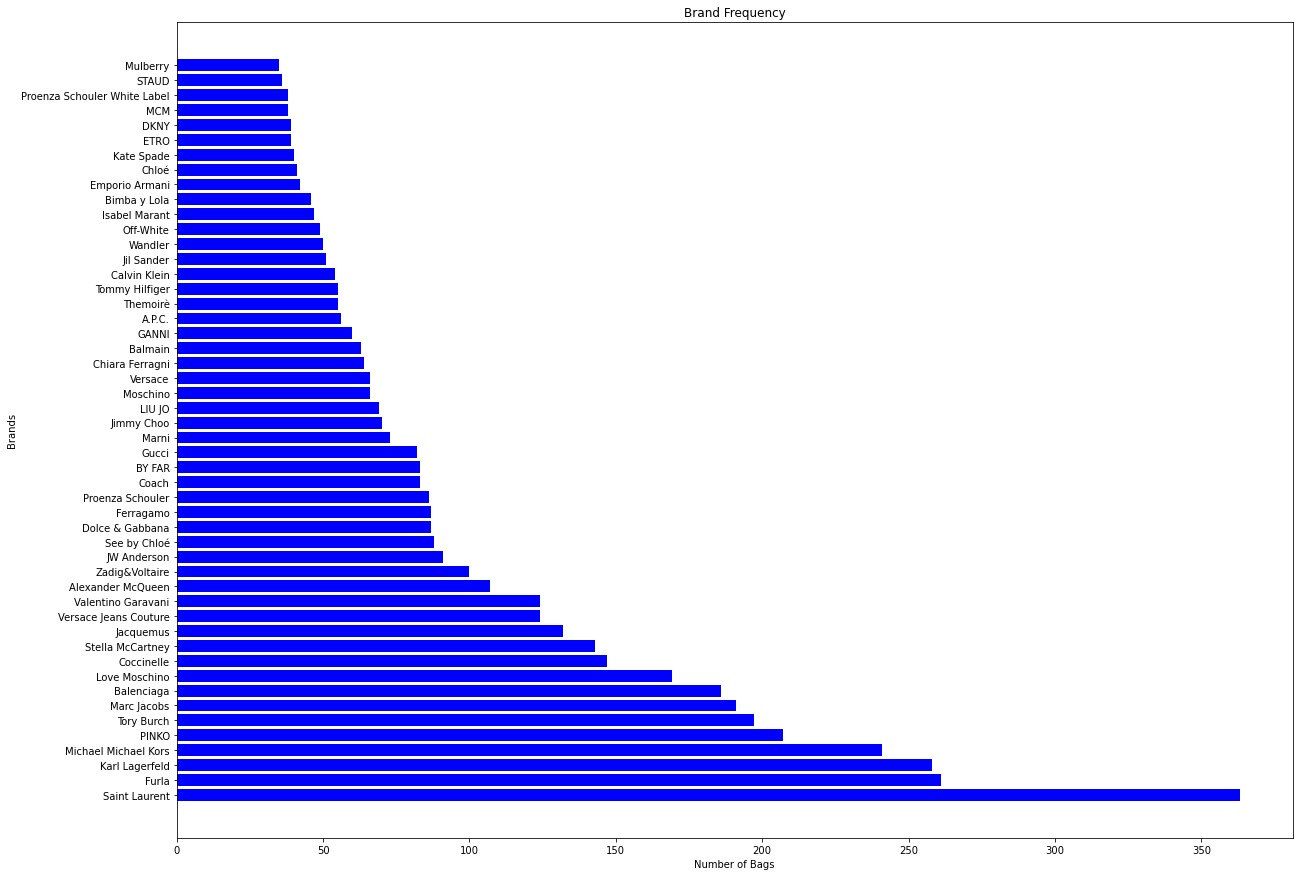

In [43]:
# Bar chart of the brands Frequency(50 mose Frequent )in our dataset

brand_counts = df_c['Brand'].value_counts().nlargest(50)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(20,15))
ax.barh(brand_counts.index, brand_counts.values, color='blue')
ax.set_xlabel('Number of Bags')
ax.set_ylabel('Brands')
ax.set_title('Brand Frequency')

plt.show()

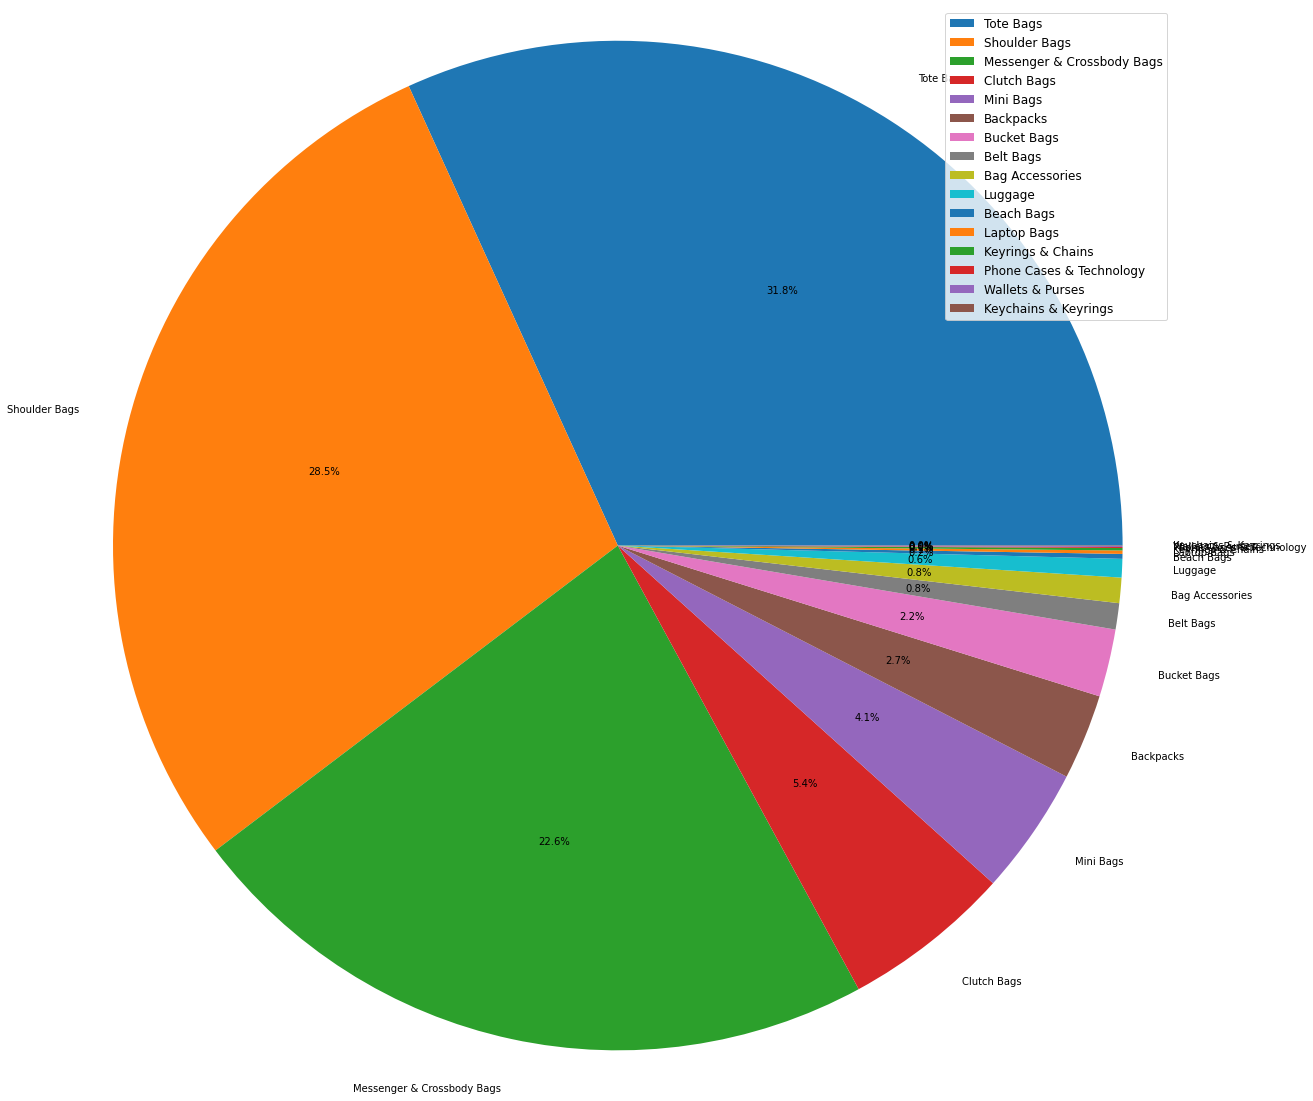

In [44]:
# create a pie chart of most popular bag types

type_counts = df_c.loc[df_c['Type'] != 'NaN', 'Type'].value_counts()
plt.figure(figsize=(20, 20))  # adjust the size of the pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # make the pie chart circular
plt.legend(type_counts.index, loc='best', fontsize=16)
plt.legend(type_counts.index, loc='best', fontsize=12)  # add a legend with the bag types as labels
plt.show()

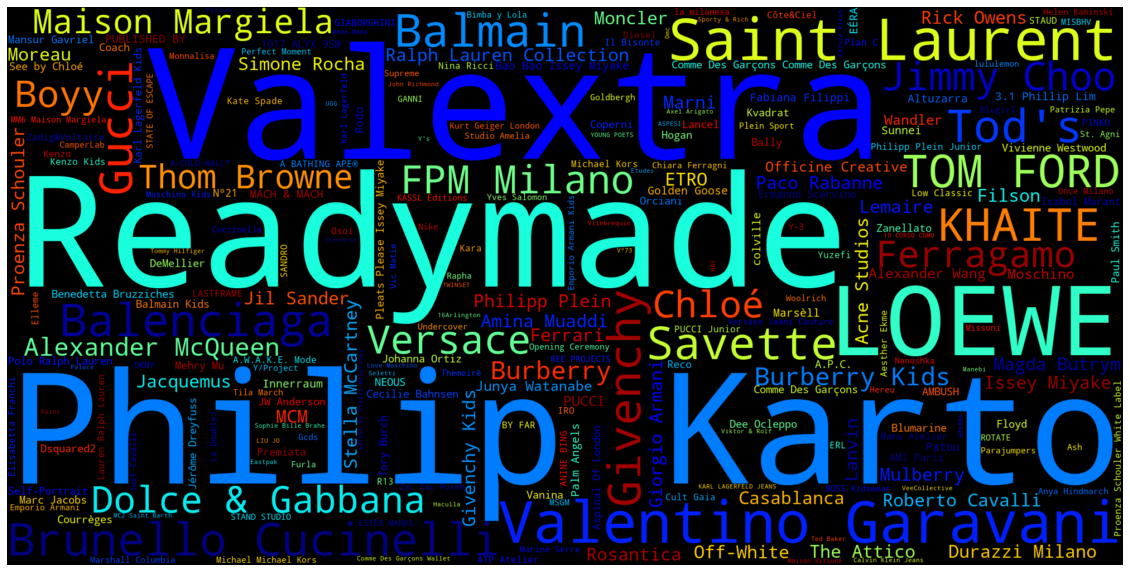

In [47]:
# create a wordcloud of the brands that sell their bags at the highs prices
brand_prices = df_c.groupby('Brand')['Price'].mean()

# convert the material prices to a dictionary
brand_prices_dict = brand_prices.to_dict()

# create a word cloud based on the frequency of material names, with the size of each word proportional to the average price of bags with that material
wordcloud = WordCloud(width=2000, height=1000, background_color='black', colormap='jet', max_words=260, relative_scaling=0, random_state=5)

wordcloud.generate_from_frequencies(frequencies=brand_prices_dict)

# plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

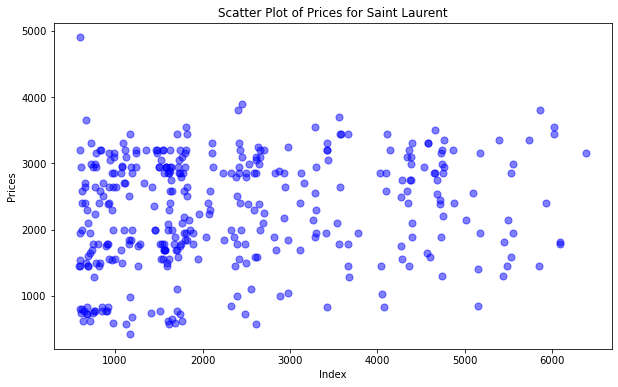

In [48]:
# Scatter plot of prices frequency - most Frequent brand by our brands Frequency Bar chart from erlier
brand = 'Saint Laurent'
df_brand = df_c[df_c['Brand'] == brand]

# create a scatter plot of the prices for the selected brand
plt.figure(figsize=(10, 6))
plt.scatter(df_brand.index, df_brand['Price'], s=50, alpha=0.5, color='blue')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Scatter Plot of Prices for ' + brand)
plt.show()

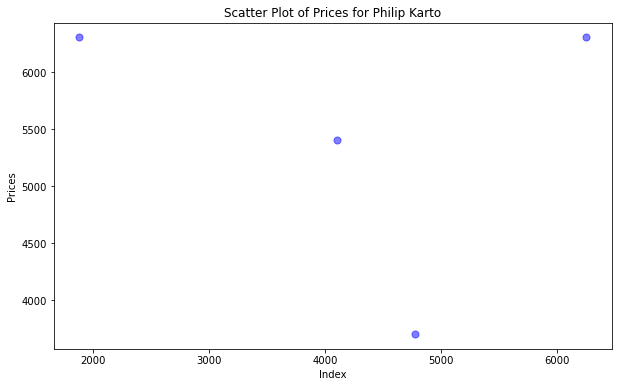

In [49]:
# Scatter plot of prices frequency - most expensive brand by our wordcloud of brands that sell their bags at the highest prices from erlier
brand = 'Philip Karto'
df_brand = df_c[df_c['Brand'] == brand]

# create a scatter plot of the prices for the selected brand
plt.figure(figsize=(10, 6))
plt.scatter(df_brand.index, df_brand['Price'], s=50, alpha=0.5, color='blue')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Scatter Plot of Prices for ' + brand)
plt.show()

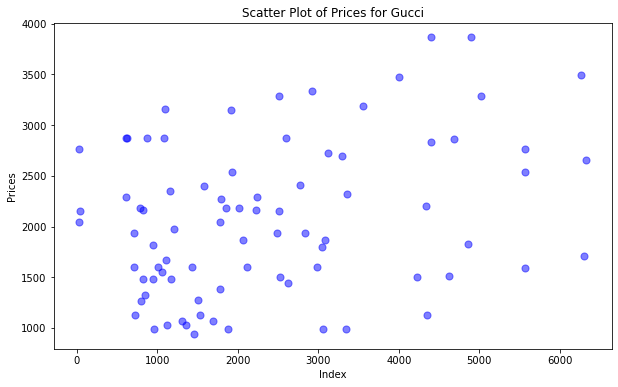

In [50]:
# Scatter plot of prices frequency - a Frequent brand by our brands Frequency Bar chart from erlier
brand = 'Gucci'
df_brand = df_c[df_c['Brand'] == brand]

# create a scatter plot of the prices for the selected brand
plt.figure(figsize=(10, 6))
plt.scatter(df_brand.index, df_brand['Price'], s=50, alpha=0.5, color='blue')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.title('Scatter Plot of Prices for ' + brand)
plt.show()

# Data Preparation

In [51]:
# trick to convert data types
df_c = pd.get_dummies(df_c)
df_c

,Description,Price,Brand_10 CORSO COMO,Brand_1017 ALYX 9SM,Brand_16Arlington,Brand_3.1 Phillip Lim,Brand_A BATHING APE®,Brand_A-COLD-WALL*,Brand_A.P.C.,Brand_A.W.A.K.E. Mode,...,color_yellow/off-white/black,color_yellow/transparent,FromNewSeason_Conscious,FromNewSeason_Exclusive,FromNewSeason_New Season,FromNewSeason_Runway,ManufacturingCountry_Made in France,ManufacturingCountry_Made in Italy,ManufacturingCountry_Made in United Kingdom,ManufacturingCountry_Made in United States
0,1,662,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,840,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1229,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,492,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,854,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6417,0,419,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6418,0,222,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6419,0,342,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6420,0,246,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
df_c.dtypes

Description                                    int32
Price                                          int64
Brand_10 CORSO COMO                            uint8
Brand_1017 ALYX 9SM                            uint8
Brand_16Arlington                              uint8
                                               ...  
FromNewSeason_Runway                           uint8
ManufacturingCountry_Made in France            uint8
ManufacturingCountry_Made in Italy             uint8
ManufacturingCountry_Made in United Kingdom    uint8
ManufacturingCountry_Made in United States     uint8
Length: 1830, dtype: object

# Modeling

In [53]:
#dependent and independent setup
X = df_c.drop('Price', axis=1)
y = df_c['Price']

In [54]:
X.columns

Index(['Description', 'Brand_10 CORSO COMO', 'Brand_1017 ALYX 9SM',
       'Brand_16Arlington', 'Brand_3.1 Phillip Lim', 'Brand_A BATHING APE®',
       'Brand_A-COLD-WALL*', 'Brand_A.P.C.', 'Brand_A.W.A.K.E. Mode',
       'Brand_AMBUSH',
       ...
       'color_yellow/off-white/black', 'color_yellow/transparent',
       'FromNewSeason_Conscious', 'FromNewSeason_Exclusive',
       'FromNewSeason_New Season', 'FromNewSeason_Runway',
       'ManufacturingCountry_Made in France',
       'ManufacturingCountry_Made in Italy',
       'ManufacturingCountry_Made in United Kingdom',
       'ManufacturingCountry_Made in United States'],
      dtype='object', length=1829)

In [55]:
y

0        662
1        840
2       1229
3        492
4        854
        ... 
6417     419
6418     222
6419     342
6420     246
6421     477
Name: Price, Length: 6422, dtype: int64

In [56]:
#separate the data to two grpups one for trainning the modle and one for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [57]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4495, 1829) (1927, 1829) (4495,) (1927,)


In [58]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))    
}

In [59]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
hypergrid = {
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]       
    },  
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]        
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]    
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] 
    }  
}

In [61]:
# Trainning our model
fit_models = {}
for algo,pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starts training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo]=model
        print('{} successfully fit'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starts training for rf.
rf successfully fit
Starts training for gb.
gb successfully fit
Starts training for ridge.
ridge successfully fit
Starts training for lasso.
lasso successfully fit
Starts training for enet.
enet successfully fit


In [62]:
# a little test to see what the modle will predict
fit_models['rf'].predict(X_test)

array([158.74050072, 293.56503571, 389.56073377, ..., 561.71181349,
       338.31726363, 382.32721032])

In [63]:
# chek the acuraccy of out models
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} score - R2:{} MAE:{}'.format(algo, r2_score(y_test,yhat),mean_absolute_error(y_test, yhat)))

rf score - R2:0.7525598938662844 MAE:216.29931401100063
gb score - R2:0.652387300066563 MAE:287.63270125729923
ridge score - R2:0.721301786385921 MAE:250.60012250308566
lasso score - R2:0.7394474991150379 MAE:238.8262734527282
enet score - R2:0.7329637725901128 MAE:249.23834456169902


In [64]:
# Another try to improve the presiction
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2, 4, 7],
        'randomforestregressor__min_samples_leaf': [1, 2, 4]       
    },  
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]        
    },
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]    
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1] 
    }  
}

In [65]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=1234)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=1234)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=1234)),
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=1234)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=1234))    
}

In [66]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starts training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} successfully fit'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starts training for rf.
rf successfully fit
Starts training for gb.


C:\Users\yulia\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.65426644 0.65426644 0.65426644 0.65426644 0.65426644 0.65426644
        nan]
  warnings.warn(


gb successfully fit
Starts training for ridge.
ridge successfully fit
Starts training for lasso.
lasso successfully fit
Starts training for enet.
enet successfully fit


In [68]:
fit_models['gd'].predict(X_test)

KeyError: 'gd'

In [67]:
fit_models['rf'].predict(X_test)

array([155.14468334, 288.78211414, 388.55103444, ..., 571.25370399,
       340.0595348 , 385.24057612])

In [69]:
# chek the acuraccy of out models
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} score - R2:{} MAE:{}'.format(algo, r2_score(y_test,yhat),mean_absolute_error(y_test, yhat)))

rf score - R2:0.753966953307781 MAE:215.56884908985703
gb score - R2:0.652387300066563 MAE:287.63270125729923
ridge score - R2:0.6645839137789238 MAE:265.4881086277934
lasso score - R2:0.7278154432125205 MAE:246.66599679180732
enet score - R2:0.6734072403519062 MAE:263.39947727443416


In [70]:
# Another try to improve the presiction
hypergrid = {
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6,6],
        'randomforestregressor__min_samples_leaf':[1,2,3,4]       
    },  
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]        
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]    
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99] 
    }  
}

In [71]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))    
}

In [72]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starts training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} successfully fit'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starts training for rf.
rf successfully fit
Starts training for gb.
gb successfully fit
Starts training for ridge.
ridge successfully fit
Starts training for lasso.
lasso successfully fit
Starts training for enet.
enet successfully fit


In [73]:
fit_models['rf'].predict(X_test)

array([158.74050072, 293.56503571, 389.56073377, ..., 561.71181349,
       338.31726363, 382.32721032])

In [74]:
# chek the acuraccy of out models
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} score - R2:{} MAE:{}'.format(algo, r2_score(y_test,yhat),mean_absolute_error(y_test, yhat)))

rf score - R2:0.7525598938662844 MAE:216.29931401100063
gb score - R2:0.652387300066563 MAE:287.63270125729923
ridge score - R2:0.721301786385921 MAE:250.60012250308566
lasso score - R2:0.7394474991150379 MAE:238.8262734527282
enet score - R2:0.7329637725901128 MAE:249.23834456169902
